In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#reading the data 
data = pd.read_csv('student.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
# gives the shape of data with respect to rows and columns
data.shape

(1000, 8)

In [10]:
#gives basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dataset basic desription
gender -> gender of the student
race/ethnicity -> what race or ethnicity student belong to
parental level of education -> does student parents are educated or not
lunch -> type of lunch will student do
test preparation course -> whther test is completed are not

In [16]:
#checking what are the columns we have
columns = data.columns

In [17]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [22]:
#categorization of numerical and categorical data
data_num = [feature for feature in columns if data[feature].dtypes != 'object']
data_cat = [feature for feature in columns if data[feature].dtypes == 'object']

In [23]:
data_num

['math score', 'reading score', 'writing score']

In [25]:
data_cat

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [39]:
#checking unique values in dataset
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [43]:
for i in columns:
    if data[i].dtypes == 'object':
        print(data[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [44]:
#checking dataset with five point stats summary
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
#checking null vaues in dataset

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

observation
we do not have null value at all in our dataset


In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
#adding column with student average marks 
data['Average'] = (data['math score'] + data['reading score'] +data['writing score'])/3

In [48]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [52]:
#checking max marks
print(f"Top score in math {data['math score'].max()}")
print(f"Top score in reading {data['reading score'].max()}")
print(f"Top score in writing {data['writing score'].max()}")

Top score in math 100
Top score in reading 100
Top score in writing 100


In [54]:
#checking min score
print(f"min score in math {data['math score'].min()}")
print(f"min score in reading {data['reading score'].min()}")
print(f"min score in writing {data['writing score'].min()}")

min score in math 0
min score in reading 17
min score in writing 10


obervation 
out of three skills math is lowset performing skill.

In [ ]:
                                 #Graphical Analysis
                               #univariate analysis
    visualizing average score distribution

<AxesSubplot:xlabel='Average', ylabel='Count'>

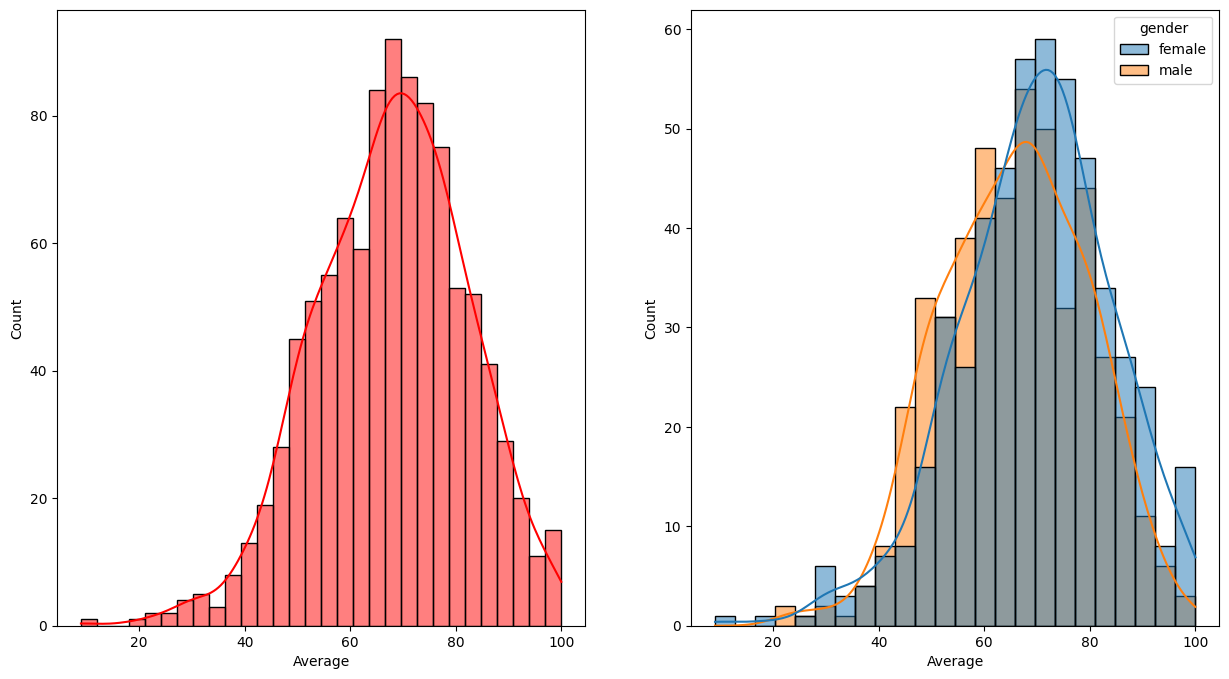

In [72]:
# using Histogram and kde

plt.subplots(figsize = (15,8))
plt.subplot(121)
sns.histplot(data = data, x = 'Average',bins = 30, kde = True, color = 'r')
plt.subplot(122)
sns.histplot(data = data, x = 'Average',kde = True, hue = 'gender')


obeservation
female performing well then men

<AxesSubplot:xlabel='Average', ylabel='Count'>

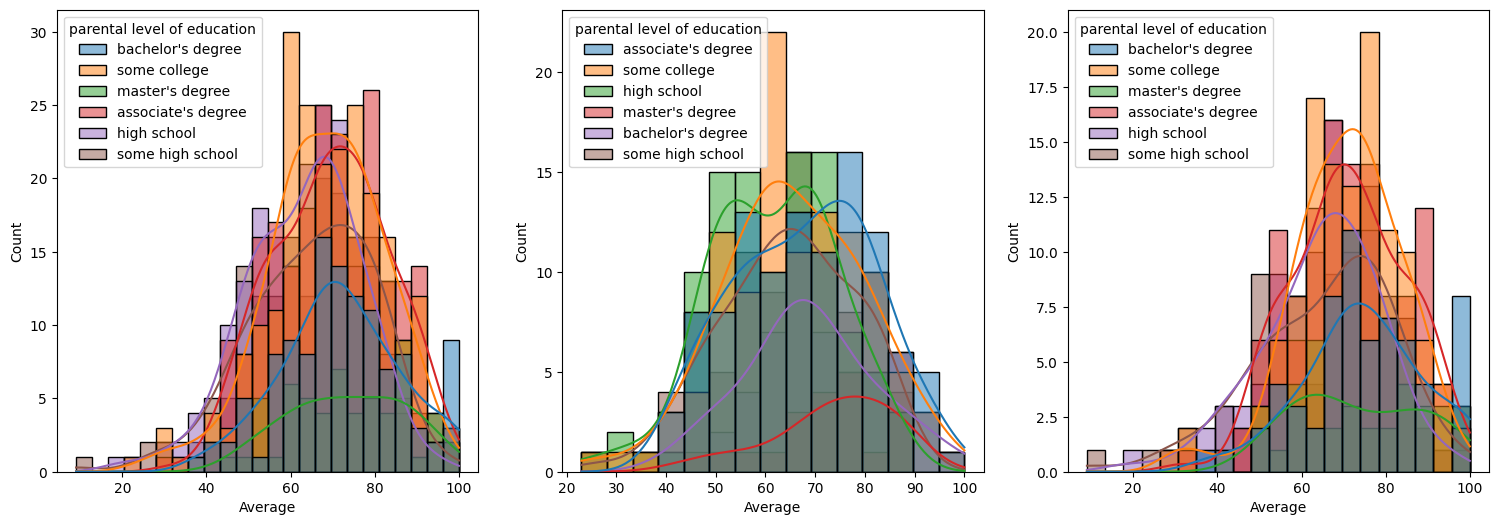

In [78]:
#checking relation of average with parental education

plt.subplots(figsize = (25,6))
plt.subplot(141)
sns.histplot(data = data, x = 'Average', hue = 'parental level of education', color = 'g', kde = True)
plt.subplot(142)
sns.histplot(data = data[data['gender'] == 'male'], x = 'Average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = data[data['gender'] == 'female'], x = 'Average', kde = True, hue = 'parental level of education')

Observation 
In general we can conclude that patrent education slight  effect on student performance

<AxesSubplot:xlabel='Average', ylabel='Count'>

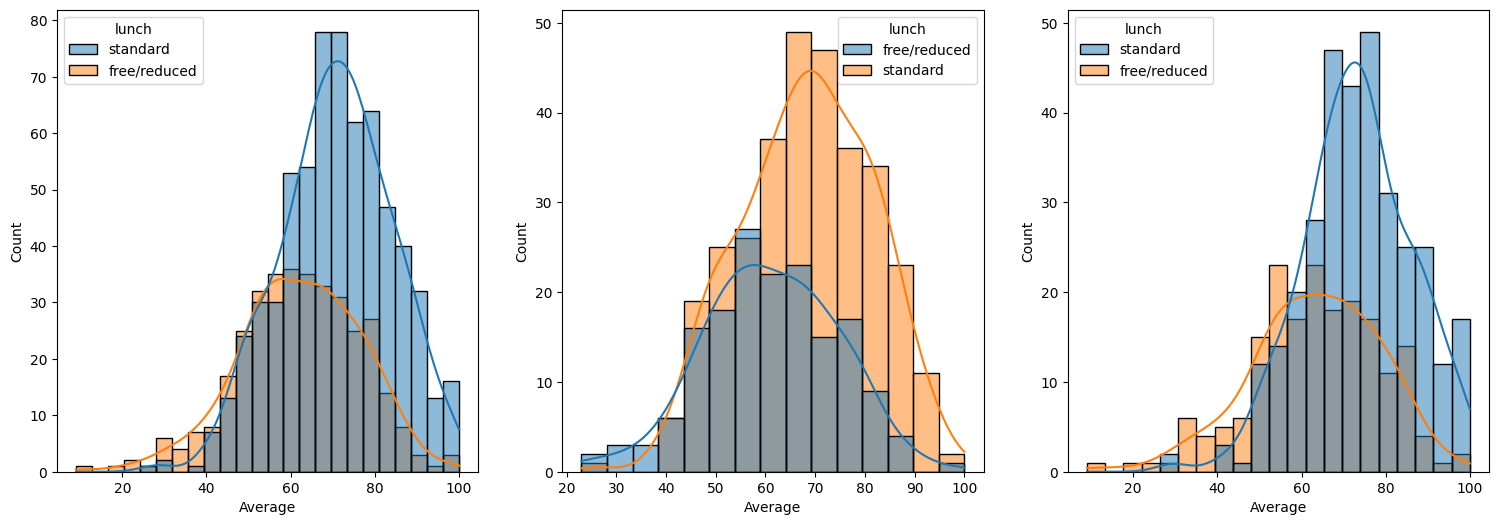

In [82]:
#checking average relation with lunch column
plt.subplots(figsize = (25,6))
plt.subplot(141)
sns.histplot(data = data, x = 'Average',hue = 'lunch', kde = True, )
plt.subplot(142)
sns.histplot(data= data[data['gender'] == 'male'],x = 'Average',hue ='lunch',kde = True )
plt.subplot(143)
sns.histplot(data= data[data['gender'] == 'female'],x = 'Average',hue ='lunch',kde = True )

observation
those student who has standard lunch habit were performed well

<AxesSubplot:xlabel='Average', ylabel='Count'>

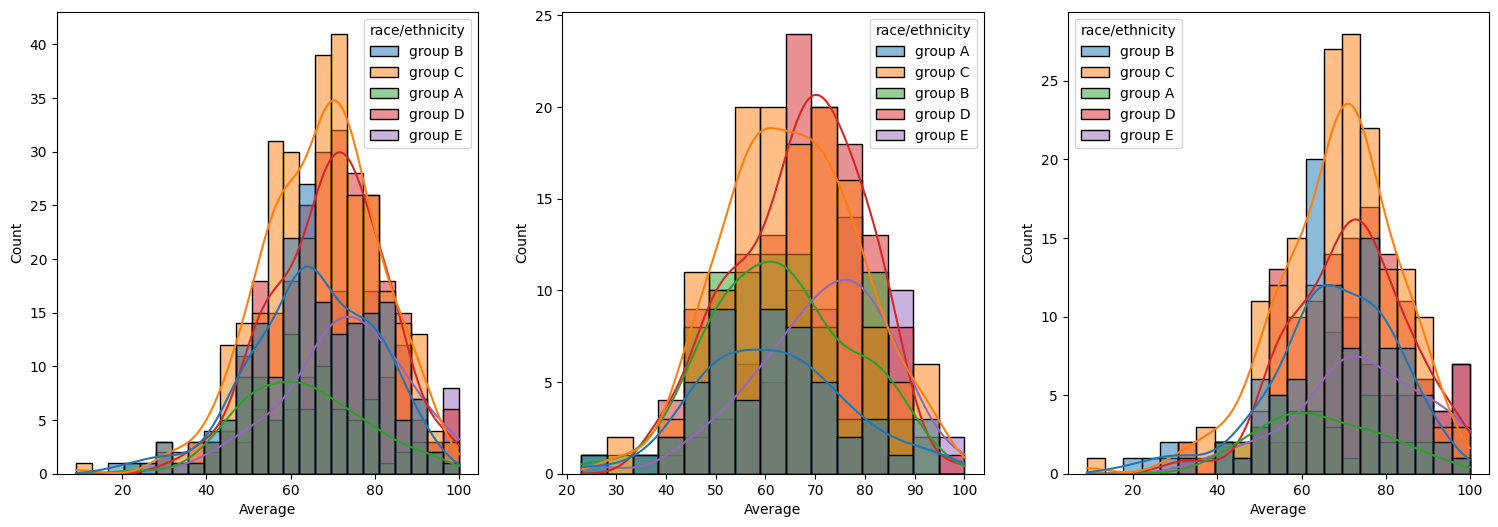

In [83]:
#checking relation average with race
plt.subplots(figsize = (25,6))
plt.subplot(141)
sns.histplot(data = data,x = 'Average',hue = 'race/ethnicity', kde = True)
plt.subplot(142)
sns.histplot(data = data[data['gender'] == 'male'], x= 'Average',hue= 'race/ethnicity',kde = True)
plt.subplot(143)
sns.histplot(data = data[data['gender'] == 'female'], x= 'Average',hue= 'race/ethnicity',kde = True)


observation
students belong to group A and group B were not performed well

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

<AxesSubplot:xlabel='Average'>

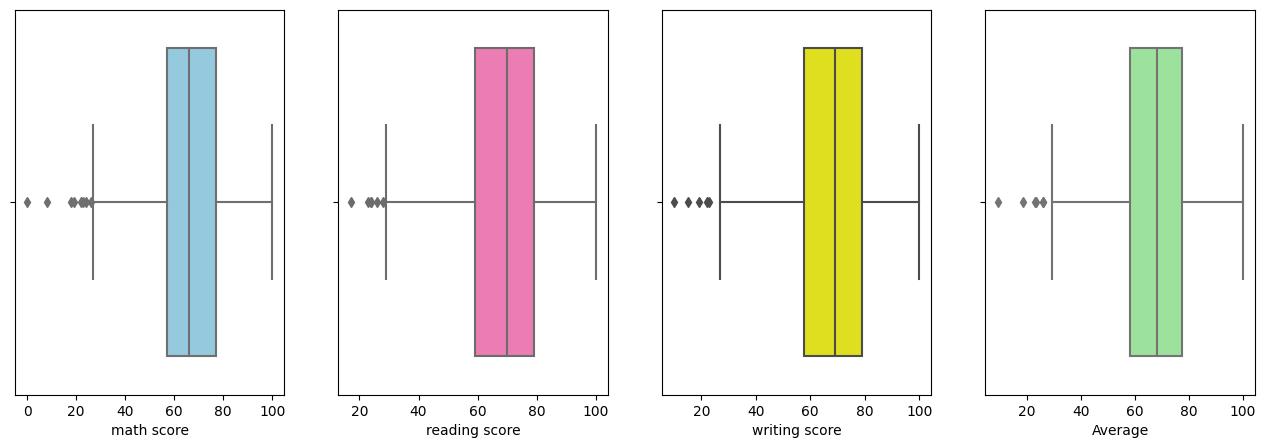

In [89]:
#checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')


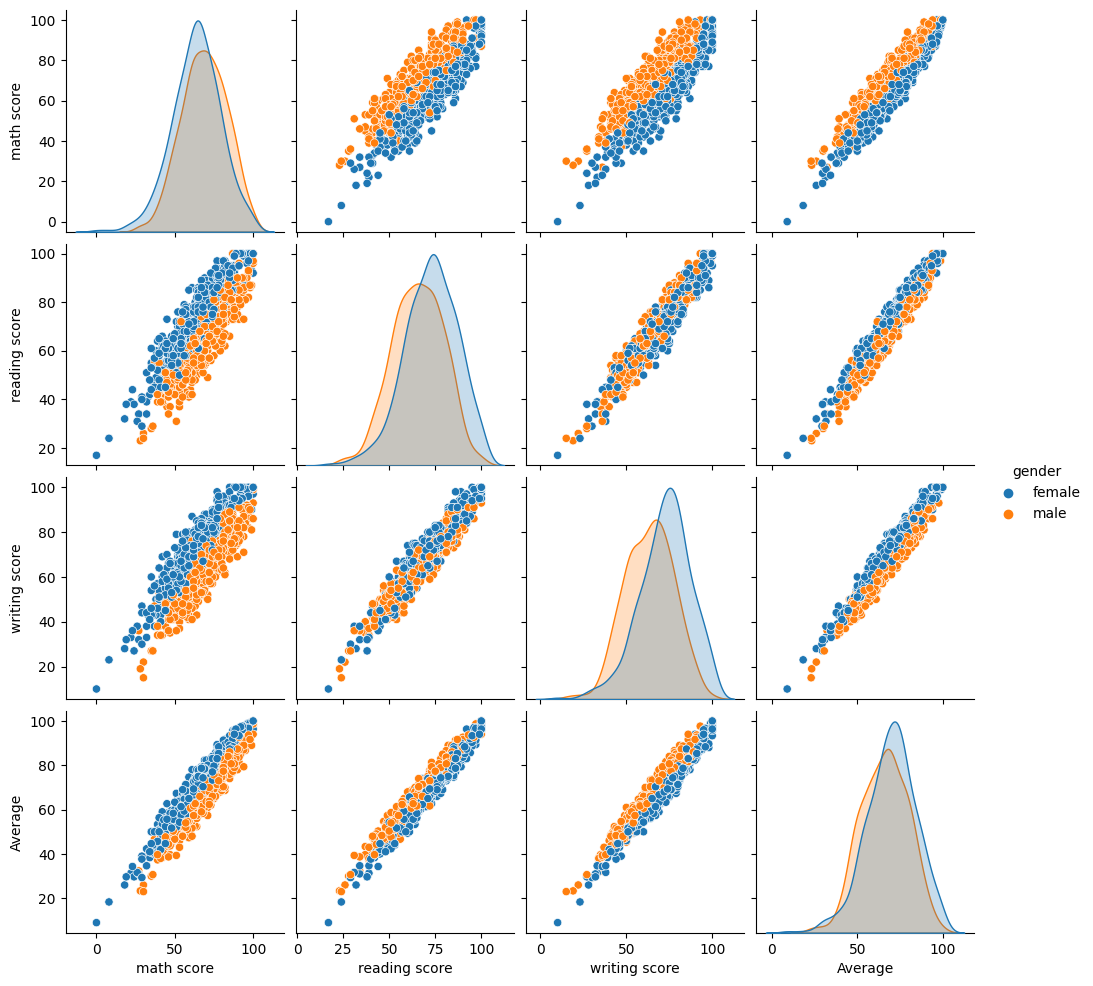

In [91]:
sns.pairplot(data=data,hue = 'gender')

In [ ]:
Final Conclusions from Observations
1. Females performed well than men
2. lunch has strong impact on student performance
